In [51]:
from database import Database
from file_utils import *
from models import Member
import pickle
import numpy as np

members = Database().members_table()

with open("people.pkl", 'rb') as file:
    all = pickle.load(file)

In [52]:
import pandas as pd

In [53]:
a = all[0]

In [54]:
a.name

'Magdalena Błeńska'

In [55]:
a.representation

array([ 0.05469247, -0.0665012 ,  0.04317334, -0.00495657, -0.04881677,
        0.07858331, -0.03891452,  0.18982802, -0.19349381,  0.05374943,
       -0.06896212,  0.02517324,  0.04573154,  0.02614803,  0.06619898,
       -0.06148352,  0.1196926 , -0.07583418,  0.08648308,  0.00418662,
        0.02058505, -0.04683811,  0.06486165,  0.03753199,  0.02355651,
        0.05065452,  0.05755502, -0.10457614, -0.13381958, -0.07012915,
       -0.01911015, -0.04911895,  0.02345225,  0.07288831, -0.09729207,
       -0.01912116, -0.0860671 ,  0.08589752, -0.13509355, -0.00525633,
       -0.0480726 , -0.01246819, -0.06158394,  0.05174482, -0.02741939,
        0.08749153,  0.03240972, -0.11484692, -0.11341407,  0.01939058,
        0.23576456,  0.01968047, -0.02157095, -0.01739761,  0.08634907,
        0.00787343,  0.04091279,  0.01201597,  0.18262288, -0.10240593,
        0.0570411 , -0.05083935, -0.13286135, -0.05200791,  0.0946802 ,
       -0.14410555, -0.01899474,  0.1301259 , -0.00420268,  0.12

In [56]:
len(all)

460

In [57]:
reps = [i.representation for i in all]

In [58]:
avg_person = np.mean(reps, axis = 0)

In [59]:
distances = [np.linalg.norm(avg_person-i) for i in reps]

In [60]:
min(distances)

0.7193356803138735

In [61]:
np.argmin(distances)

54

In [62]:
np.argsort(distances)[:3]

array([ 54, 223, 326])

In [63]:
all[54].name, all[223].name, all[326].name

('Piotr Zgorzelski', 'Tomasz Zieliński', 'Józef Brynkus')

In [64]:
df = pd.DataFrame(reps)

In [221]:
from sklearn.manifold import TSNE
df_embedded = TSNE(n_components=2).fit_transform(df)

In [222]:
tsne.fit(df)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)

In [223]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# 
# pca.fit(df)

In [224]:
pca_pred = pd.DataFrame(pca.transform(df))

In [225]:
pca_pred = pd.DataFrame(df_embedded)

In [226]:
pca_pred['color'] = 'green'
pca_pred['size'] = 30

In [227]:
pca_pred.loc[54,'color'] = 'red'
pca_pred.loc[223,'color'] = 'red'
pca_pred.loc[326,'color'] = 'red'
pca_pred.loc[54,'size'] =  60 
pca_pred.loc[223,'size'] = 60
pca_pred.loc[326,'size'] = 60

In [228]:
pca_pred.head()

,0,1,color,size
0,18.708027,5.852022,green,30
1,22.234932,19.397507,green,30
2,-1.698060,2.973945,green,30
3,-18.028090,5.257444,green,30
4,-11.758854,-7.054546,green,30


In [229]:
sex = [i.name.split(' ')[0][-1] == 'a' for i in all]

In [230]:
len(sex)

460

In [231]:
pca_pred['women'] = np.array(sex).astype(int)

In [232]:
pca_pred['women'] = np.where(pca_pred['women'] == 1, "<","+")

In [233]:
import matplotlib.pyplot as plt

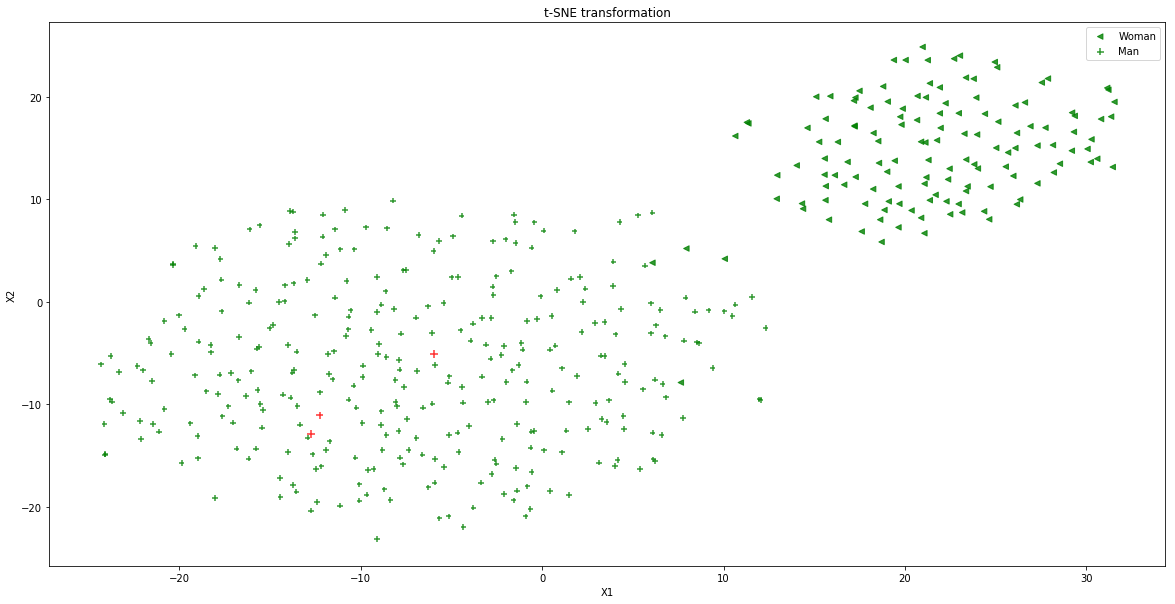

In [234]:
plt.figure(figsize=(20,10))
for marker in ["<","+"]:
    if marker == "+":
        shape = 'Man'
    else:
        shape = 'Woman'
        
    df_to_plot = pca_pred[pca_pred['women'] == marker]
    plt.scatter(df_to_plot[0],
            df_to_plot[1], 
            c = df_to_plot['color'], 
            alpha = 0.8, 
            s = df_to_plot['size'], 
            marker=marker,
            label=shape)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(numpoints=1)
plt.title("t-SNE transformation")
plt.show()

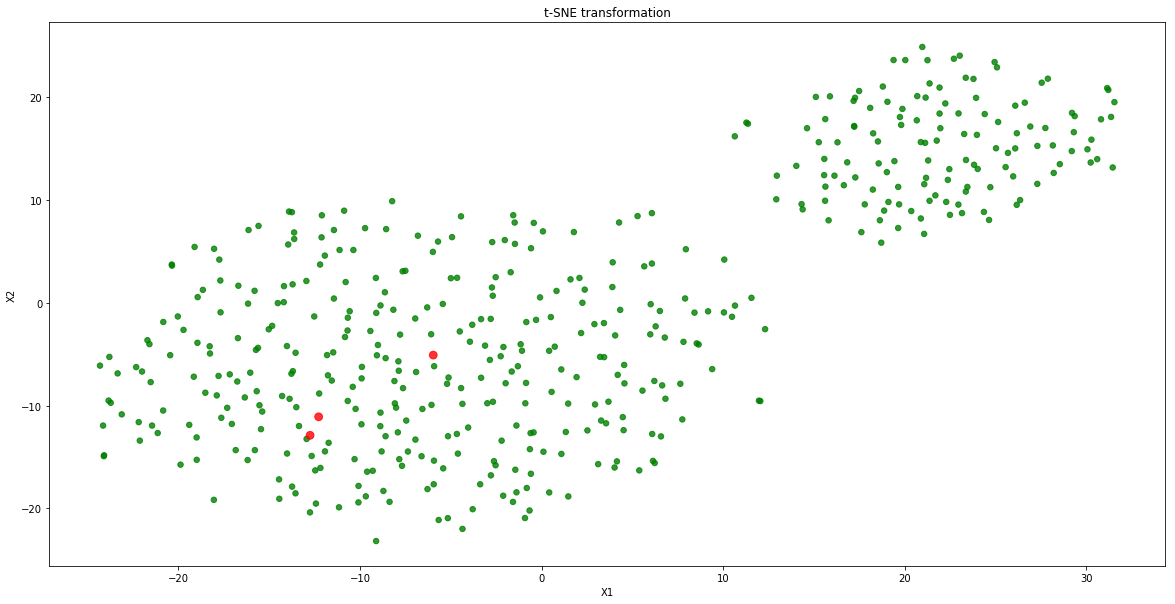

In [235]:
plt.figure(figsize=(20,10))
plt.scatter(pca_pred[0],
            pca_pred[1], 
            c = pca_pred['color'], 
            alpha = 0.8, 
            s = pca_pred['size'])
plt.xlabel('X1')
plt.ylabel('X2')

plt.title("t-SNE transformation")
plt.show()

In [236]:
from sklearn.cluster import KMeans

In [237]:
from sklearn.preprocessing import StandardScaler

In [238]:
scaler = StandardScaler()


In [239]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaler.fit_transform(pca_pred.iloc[:,:2]) )

/home/rafal/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rafal/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [240]:
pca_pred['clust'] = kmeans.labels_

In [241]:
pca_pred['clust'] = np.where(pca_pred['clust'] == 0, 'orange', pca_pred['clust'])
pca_pred['clust'] = np.where(pca_pred['clust'] == '1', 'green', pca_pred['clust'])
pca_pred['clust'] = np.where(pca_pred['clust'] == '2', 'blue', pca_pred['clust'])

In [242]:
pca_pred.head()

,0,1,color,size,women,clust
0,18.708027,5.852022,green,30,<,green
1,22.234932,19.397507,green,30,<,green
2,-1.698060,2.973945,green,30,+,blue
3,-18.028090,5.257444,green,30,+,blue
4,-11.758854,-7.054546,green,30,+,orange


In [243]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([180, 131, 149]))

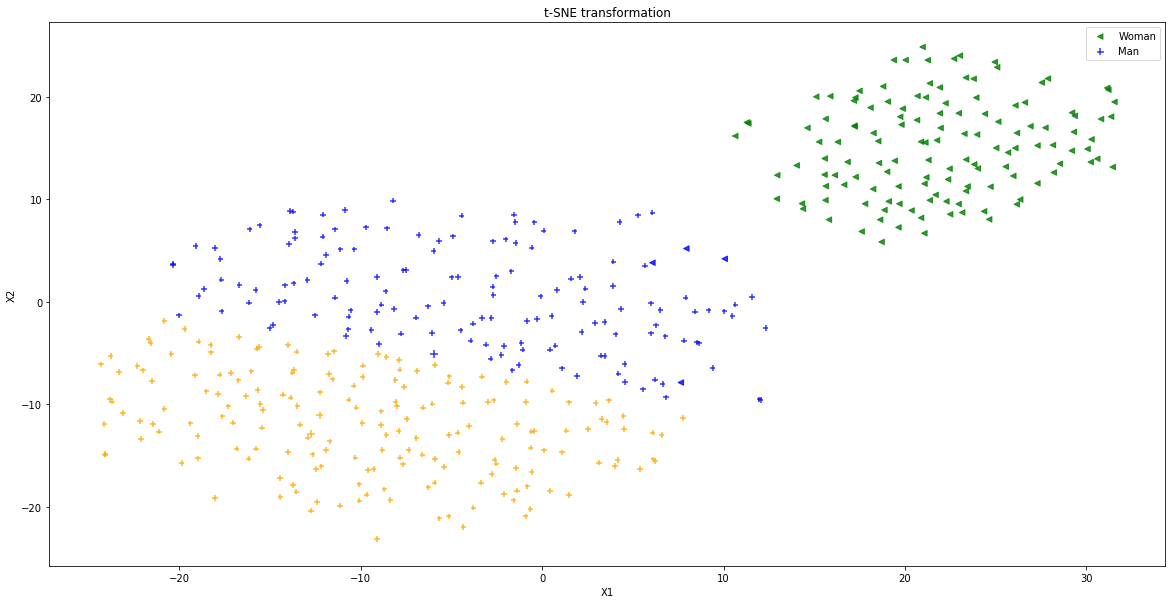

In [244]:
plt.figure(figsize=(20,10))
for marker in ["<","+"]:
    if marker == "+":
        shape = 'Man'
    else:
        shape = 'Woman'
    
    df_to_plot = pca_pred[pca_pred['women'] == marker]
    plt.scatter(df_to_plot[0],
            df_to_plot[1], 
            c = df_to_plot['clust'], 
            alpha = 0.8, 
            s = df_to_plot['size'], 
            marker=marker,
            label=shape)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(numpoints=1)
plt.title("t-SNE transformation")
plt.show()

In [245]:
pca_pred.iloc[:,:2].values

array([[ 1.87080269e+01,  5.85202217e+00],
       [ 2.22349319e+01,  1.93975067e+01],
       [-1.69806015e+00,  2.97394538e+00],
       [-1.80280895e+01,  5.25744390e+00],
       [-1.17588539e+01, -7.05454636e+00],
       [ 5.38318920e+00, -1.63026772e+01],
       [ 4.02389765e+00, -1.60214462e+01],
       [ 4.55190182e+00, -6.04358864e+00],
       [-4.64551926e+00,  2.43676066e+00],
       [-1.78801346e+01, -9.00663567e+00],
       [-3.94183755e+00, -3.78274536e+00],
       [ 3.55658913e+00, -1.17210855e+01],
       [-9.71399593e+00,  7.26351595e+00],
       [-4.50041294e+00, -2.78394914e+00],
       [ 9.17226982e+00, -8.27145040e-01],
       [-1.39468460e+01,  5.67336178e+00],
       [ 6.13584614e+00, -1.53748188e+01],
       [-2.52393460e+00,  2.49425054e+00],
       [ 1.47618043e+00, -1.88342552e+01],
       [-9.90424728e+00, -7.35340834e+00],
       [-1.80408669e+01, -1.91687050e+01],
       [ 2.19619522e+01,  1.69855289e+01],
       [-1.67519760e+01, -7.65424347e+00],
       [ 1.

In [246]:
np.sum((kmeans.cluster_centers_[0] - pca_pred.iloc[:,:2].values)**2,axis =1 ).shape

(460,)

In [247]:
kmeans.cluster_centers_[1] - pca_pred.iloc[:,:2].values[0]

array([-17.3566326 ,  -4.56952927])

In [248]:
(kmeans.cluster_centers_[0] - pca_pred.iloc[:,:2].values)**2

array([[3.77373171e+02, 4.67158920e+01],
       [5.26840216e+02, 4.15360176e+02],
       [9.60384198e-01, 1.56564696e+01],
       [2.99636838e+02, 3.89416464e+01],
       [1.21898949e+02, 3.68651285e+01],
       [3.72253421e+01, 2.34696175e+02],
       [2.24862403e+01, 2.26158465e+02],
       [2.77725842e+01, 2.56107687e+01],
       [1.54248717e+01, 1.16939444e+01],
       [2.94536522e+02, 6.43806499e+01],
       [1.03926887e+01, 7.83924426e+00],
       [1.82726954e+01, 1.15309052e+02],
       [8.09267155e+01, 6.80030514e+01],
       [1.43061316e+01, 3.24384889e+00],
       [9.78187865e+01, 2.42534767e-02],
       [1.75000562e+02, 4.43055588e+01],
       [4.69761420e+01, 2.07127893e+02],
       [3.26115340e+00, 1.20904390e+01],
       [4.81472714e+00, 3.18671586e+02],
       [8.43858858e+01, 4.05836272e+01],
       [3.00079353e+02, 3.30724219e+02],
       [5.14383327e+02, 3.22863731e+02],
       [2.57086199e+02, 4.45070863e+01],
       [2.50415078e+02, 4.41675924e+02],
       [8.582874

In [249]:
np.sum((kmeans.cluster_centers_[0] - pca_pred.iloc[:,:2].values)**2,axis=1)

array([4.24089063e+02, 9.42200392e+02, 1.66168538e+01, 3.38578484e+02,
       1.58764077e+02, 2.71921517e+02, 2.48644705e+02, 5.33833529e+01,
       2.71188161e+01, 3.58917172e+02, 1.82319330e+01, 1.33581747e+02,
       1.48929767e+02, 1.75499805e+01, 9.78430400e+01, 2.19306121e+02,
       2.54104035e+02, 1.53515924e+01, 3.23486313e+02, 1.24969513e+02,
       6.30803571e+02, 8.37247058e+02, 3.01593286e+02, 6.92091001e+02,
       9.46063548e+01, 9.65082575e+01, 5.07576294e+01, 2.99584687e+02,
       5.44064182e+01, 4.62196991e+02, 3.18619441e+02, 3.95974983e+01,
       8.08101985e+02, 1.30298802e+02, 1.82610637e+02, 4.05143443e+02,
       2.32061276e+02, 1.54920461e+02, 6.65441357e+02, 1.21077189e+03,
       1.39249671e+02, 3.38180150e+02, 3.18120151e+02, 1.02091214e+02,
       5.22700824e+02, 1.29788745e+02, 4.27484847e+02, 6.50043689e+02,
       5.27975427e+02, 6.12341681e+02, 6.72427368e+01, 1.74513528e+02,
       1.76385270e+02, 1.43851445e+01, 2.35591938e+02, 1.36449815e+01,
      

In [250]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[ -9.60709126, -12.00079649],
       [ 21.82140653,  15.18897102],
       [ -3.57194232,   0.51393755]])

In [251]:
kmeans.cluster_centers_

array([[-0.71806822, -0.98288032],
       [ 1.35139429,  1.2824929 ],
       [-0.32067364,  0.05981132]])

In [252]:
arg0 = np.argmin(np.sum((scaler.inverse_transform(kmeans.cluster_centers_)[0] - pca_pred.iloc[:,:2].values)**2, axis=1 ))
arg1 = np.argmin(np.sum((scaler.inverse_transform(kmeans.cluster_centers_)[1] - pca_pred.iloc[:,:2].values)**2, axis=1 ))
arg2 = np.argmin(np.sum((scaler.inverse_transform(kmeans.cluster_centers_)[2] - pca_pred.iloc[:,:2].values)**2, axis=1 ))

In [253]:
arg0

422

In [254]:
pca_pred.loc[arg0,'clust'] = 'red'
pca_pred.loc[arg1,'clust'] = 'red'
pca_pred.loc[arg2,'clust'] = 'red'
pca_pred.loc[arg0,'size'] =  120 
pca_pred.loc[arg1,'size'] =  120
pca_pred.loc[arg2,'size'] =  120

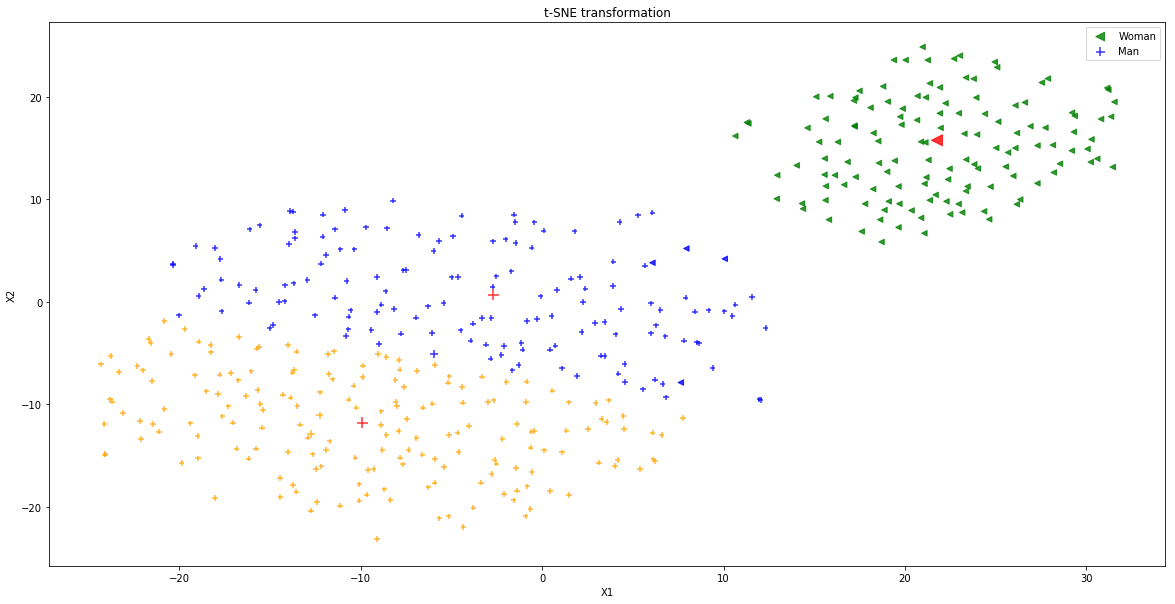

In [255]:
plt.figure(figsize=(20,10))
for marker in ["<","+"]:
    if marker == "+":
        shape = 'Man'
    else:
        shape = 'Woman'
    
    df_to_plot = pca_pred[pca_pred['women'] == marker]
    plt.scatter(df_to_plot[0],
            df_to_plot[1], 
            c = df_to_plot['clust'], 
            alpha = 0.8, 
            s = df_to_plot['size'], 
            marker=marker,
            label=shape)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(numpoints=1)
plt.title("t-SNE transformation")
plt.show()

In [259]:
all[arg0].name, all[arg1].name, all[arg2].name

('Robert Tyszkiewicz', 'Anna Elżbieta Sobecka', 'Tadeusz Woźniak')